In [1]:
import pkg_resources
pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/xingyuchen0810/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [53]:
filename="data/new_tiktok_google_play_reviews.csv"

df=pd.read_csv(filename)
df = df[df['new_content'].notnull()]

In [54]:
new_df = df[df['new_content'].apply(lambda x: len(x) > 3) & df['new_content'].apply(lambda x: len(x) < 50)]

In [55]:
new_df.head(20)

,content,score,new_content
0,No words,5,word
1,Great fun app so far!,5,great fun app far
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,picture record
5,I love this amazing app,5,love amazing app
6,Mohammed Rehan,5,mohamme rehan
7,Love being on Tik Tok.,5,love tik tok
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
11,Love,5,love
12,Good,5,good


In [56]:
HeadlineLIST= new_df['new_content']
LabelLIST=new_df['score']

In [57]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english",
    max_features=50
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names()
DF_Count=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [58]:
new_df.loc[new_df['score'] == 5, 'score'] = 'very good'
new_df.loc[new_df['score'] == 4, 'score'] = 'good'
new_df.loc[new_df['score'] == 3, 'score'] = 'average'
new_df.loc[new_df['score'] == 2, 'score'] = 'bad'
new_df.loc[new_df['score'] == 1, 'score'] = 'very bad'

In [59]:
new_df = new_df.reset_index()

In [60]:
DF_Count=DF_Count.rename(new_df['score'], axis="index")
print(DF_Count) 

           account  amazing  app  application  awesome  bad  ban  cool  \
very good        0        0    0            0        0    0    0     0   
very good        0        0    1            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        1    1            0        0    0    0     0   
...            ...      ...  ...          ...      ...  ...  ...   ...   
very good        0        0    0            0        0    0    0     0   
very bad         0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   
very good        0        0    0            0        0    0    0     0   

           download  easy  ...  time  tok  update  use  video  view  viral  \
very good         0     0  ...   

In [64]:
DF_Count = DF_Count.reset_index()

In [75]:
DF_Count

,index,LABEL,amazing,app,application,awesome,bad,ban,cool,download,...,time,tok,update,use,video,view,viral,watch,wonderful,work
0,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,very good,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,very good,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354154,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354155,very bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354156,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354157,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_downsampled = DF_Count.groupby('index').apply(lambda x: x.sample(n=5000))

print(df_downsampled.shape)

(25000, 51)


In [79]:
df_downsampled

index  LABEL  amazing  app  application  awesome  bad  \
index                                                                         
average   313364    average      0        0    0            0        0    0   
          131978    average      0        0    0            0        0    0   
          119607    average      0        0    0            0        0    0   
          79513     average      0        0    0            0        0    0   
          56897     average      0        0    1            0        0    0   
...                     ...    ...      ...  ...          ...      ...  ...   
very good 252931  very good      0        0    0            0        0    0   
          61098   very good      0        0    1            0        0    0   
          114083  very good      0        0    1            0        0    0   
          134401  very good      0        0    0            0        0    0   
          22969   very good      0        0    0            0        0    0   

                  ban  cool  download  ...  time  tok  update  use  video  \
index                                  ...                                  
average   313364    0     0         0  ...     0    0       0    0      0   
          131978    0     0         0  ...     0    0       0    0      0   
          119607    0     0         0  ...     0    0       0    0      0   
          79513     0     0         0  ...     0    0       0    0      0   
          56897     0     0         0  ...     0    0       0    0      0   
...               ...   ...       ...  ...   ...  ...     ...  ...    ...   
very good 252931    0     0         0  ...     0    0       0    0      0   
          61098     0     0         0  ...     0    0       0    0      0   
          114083    0     0         0  ...     0    0       0    0      0   
          134401    0     0         0  ...     0    0       0    0      0   
          22969     0     0         0  ...     0    0       0    0      0   

                  view  viral  watch  wonderful  work  
index                                                  
average   313364     0      0      0          0     0  
          131978     0      0      0          0     0  
          119607     0      0      0          0     0  
          79513      0      0      0          0     0  
          56897      0      0      0          0     0  
...                ...    ...    ...        ...   ...  
very good 252931     0      0      0          0     0  
          61098      0      0      0          0     0  
          114083     0      0      0          0     0  
          134401     0      0      0          0     0  
          22969      0      0      0          0     0  

[25000 rows x 51 columns]

In [80]:
df_downsampled.to_csv('df_count.csv')

In [100]:
filename="df_count.csv"

df=pd.read_csv(filename)
df = df.rename(columns={ df.columns[0]: "LABEL" })
df_tem = df
df_tem = df_tem.drop(['LABEL'], axis = 1)
df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 100], axis=1, inplace=True)
df_tem

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_21825/3291927641.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 100], axis=1, inplace=True)


,amazing,app,application,awesome,bad,ban,cool,download,easy,enjoy,...,thank,thing,time,update,use,video,view,viral,watch,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_tem['Label'] = df['LABEL']
df_tem

,amazing,app,application,awesome,bad,ban,cool,download,easy,enjoy,...,thing,time,update,use,video,view,viral,watch,work,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
24996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
24997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good


In [102]:
df_tem.to_csv('df_count_tem.csv')

In [103]:
df_tem['Label'].value_counts()

average      5000
bad          5000
good         5000
very bad     5000
very good    5000
Name: Label, dtype: int64

In [104]:

##################################################
##
##        Now we have 4 labeled dataframes!
##
##        Let's model them.....
##
######################################################

## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(df_tem, test_size=0.2)
print(TrainDF1)
print(TestDF1)

       amazing  app  application  awesome  bad  ban  cool  download  easy  \
7389         0    0            0        0    0    0     0         0     0   
21831        0    0            0        0    0    0     0         0     0   
15474        0    0            0        0    0    0     0         0     0   
5445         0    0            0        0    0    1     0         0     0   
3617         0    1            0        0    0    0     0         0     0   
...        ...  ...          ...      ...  ...  ...   ...       ...   ...   
5803         0    0            0        0    0    0     0         0     0   
4626         0    0            0        0    0    0     0         0     0   
8560         0    0            0        0    0    0     0         0     0   
13492        0    1            0        0    0    0     0         0     0   
23356        0    0            0        0    0    0     0         0     0   

       enjoy  ...  thing  time  update  use  video  view  viral  watch  wor

In [105]:
Test1Labels=TestDF1["Label"]
print(Test1Labels)
## remove labels
TestDF1 = TestDF1.drop(["Label"], axis=1)
## TRAIN ----------------------------
Train1Labels=TrainDF1["Label"]
## remove labels
TrainDF1 = TrainDF1.drop(["Label"], axis=1)

16293     very bad
317        average
16078     very bad
9854           bad
5940           bad
           ...    
23980    very good
3778       average
21865    very good
1131       average
19199     very bad
Name: Label, Length: 5000, dtype: object


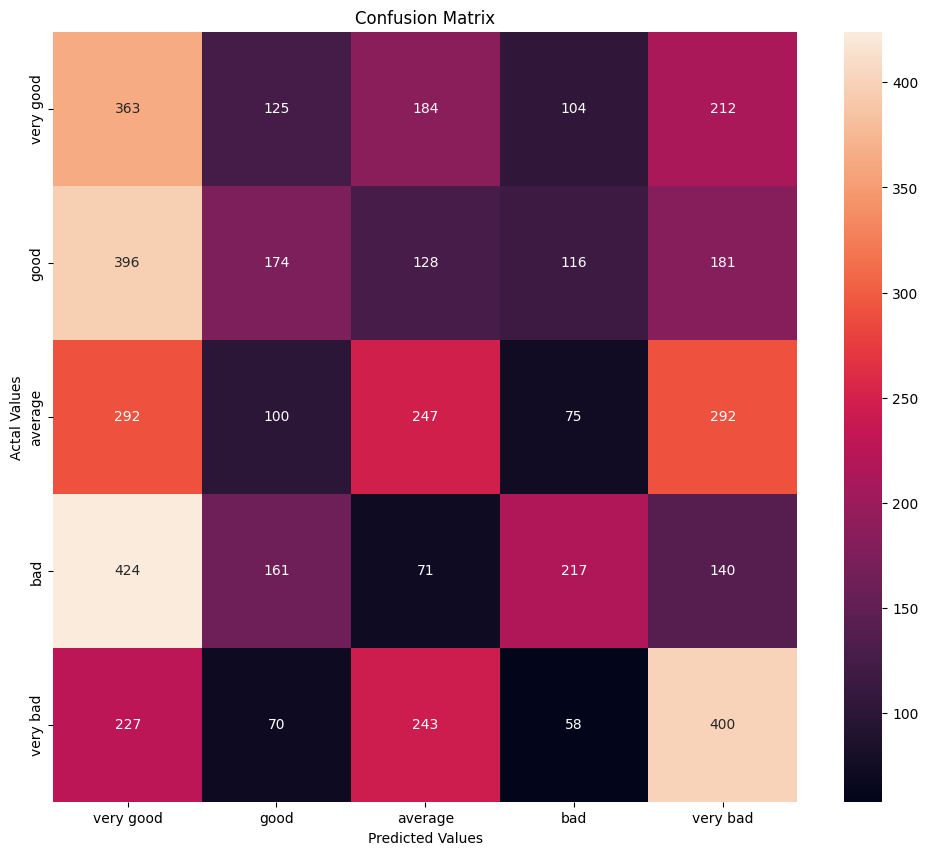

In [106]:
####################################################################
########################### Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()



# ## Run on all three Dfs.................
# NB1=MyModelNB.fit(TrainDF1, Train1Labels_new_cate)
# Prediction1 = MyModelNB.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))

NB2=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction2 = MyModelNB.predict(TestDF1)
# print(np.round(MyModelNB.predict_proba(TestDF1),2))
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Index(['amazing', 'app', 'application', 'awesome', 'bad', 'ban', 'cool',
       'download', 'easy', 'enjoy', 'entertain', 'entertainment', 'excellent',
       'experience', 'fun', 'funny', 'good', 'great', 'happy', 'help',
       'interesting', 'like', 'lot', 'love', 'make', 'need', 'new', 'nice',
       'people', 'plz', 'problem', 'really', 'star', 'team', 'thank', 'thing',
       'time', 'update', 'use', 'video', 'view', 'viral', 'watch', 'work'],
      dtype='object')


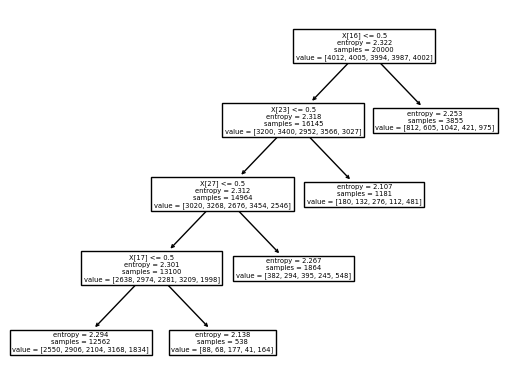

In [125]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#########################################################
#############    Decision Trees   #######################
#########################################################
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
## In Python - the Decision Trees work ONLY on numeric data

### TEST
#print(StudentTestLabels_Num)
#print(StudentTestData_Num)
### TRAIN - Num
#print(StudentTrainLabels_Num)
#print(StudentTrainData_Num)

#---------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=5, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

## perform DT
MyDT_R.fit(TrainDF1, Train1Labels)
    ## plot the tree
tree.plot_tree(MyDT_R)

feature_namesR=TrainDF1.columns
print(feature_namesR)


In [126]:
feature_namesR[17]

'great'

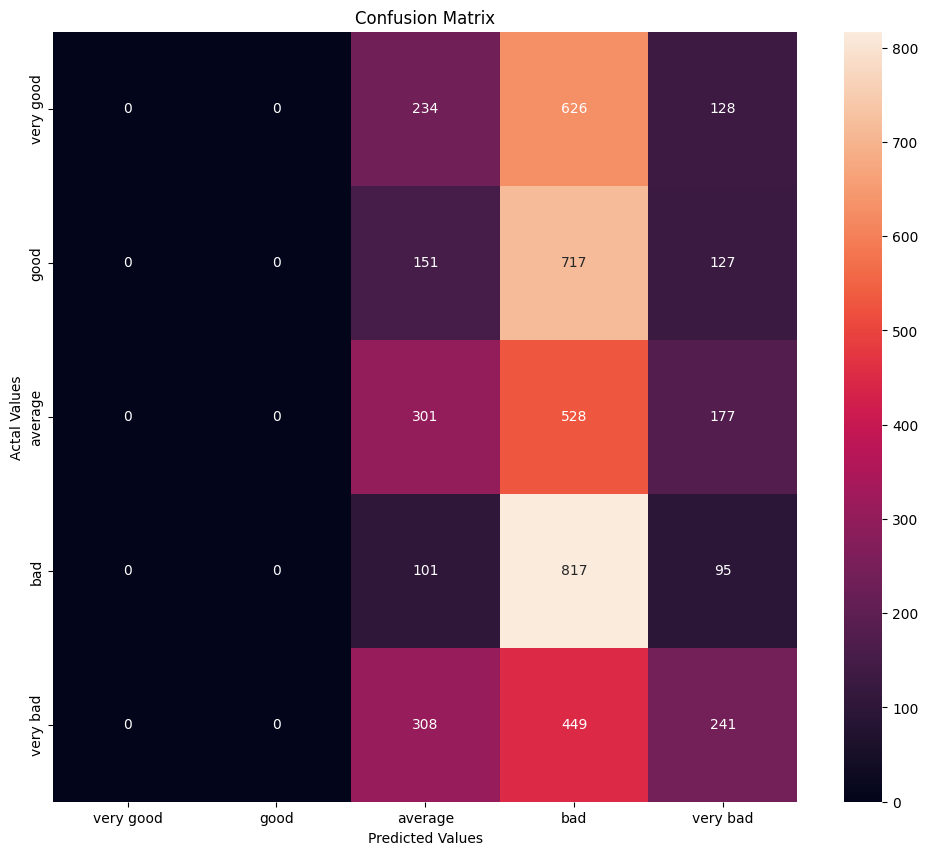

In [127]:
Prediction2 = MyDT_R.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

[LibSVM]....
**.
*
optimization finished, #iter = 4956
obj = -7432.817929, rho = -2.803154
nSV = 7599, nBSV = 7547
....
*
optimization finished, #iter = 4362
obj = -7302.452836, rho = 1.137276
nSV = 7506, nBSV = 7438
...
*.
*
optimization finished, #iter = 4568
obj = -6830.618789, rho = -3.780826
nSV = 7066, nBSV = 7014
...
*.
*
optimization finished, #iter = 4225
obj = -6707.274192, rho = 2.282904
nSV = 7025, nBSV = 6972
...
*.
*
optimization finished, #iter = 4853
obj = -6448.814094, rho = 3.453276
nSV = 6795, nBSV = 6711
...*.
*
optimization finished, #iter = 4057
obj = -7490.747828, rho = -2.128809
nSV = 7609, nBSV = 7577
...
*.
*
optimization finished, #iter = 4208
obj = -5798.265848, rho = 3.821663
nSV = 6193, nBSV = 6136
...
*.
*
optimization finished, #iter = 4978
obj = -5783.902385, rho = -3.791703
nSV = 6150, nBSV = 6070
....
*
optimization finished, #iter = 4304
obj = -7283.347849, rho = 1.157177
nSV = 7473, nBSV = 7422
...
*.
*
optimization finished, #iter = 4010
obj = -515

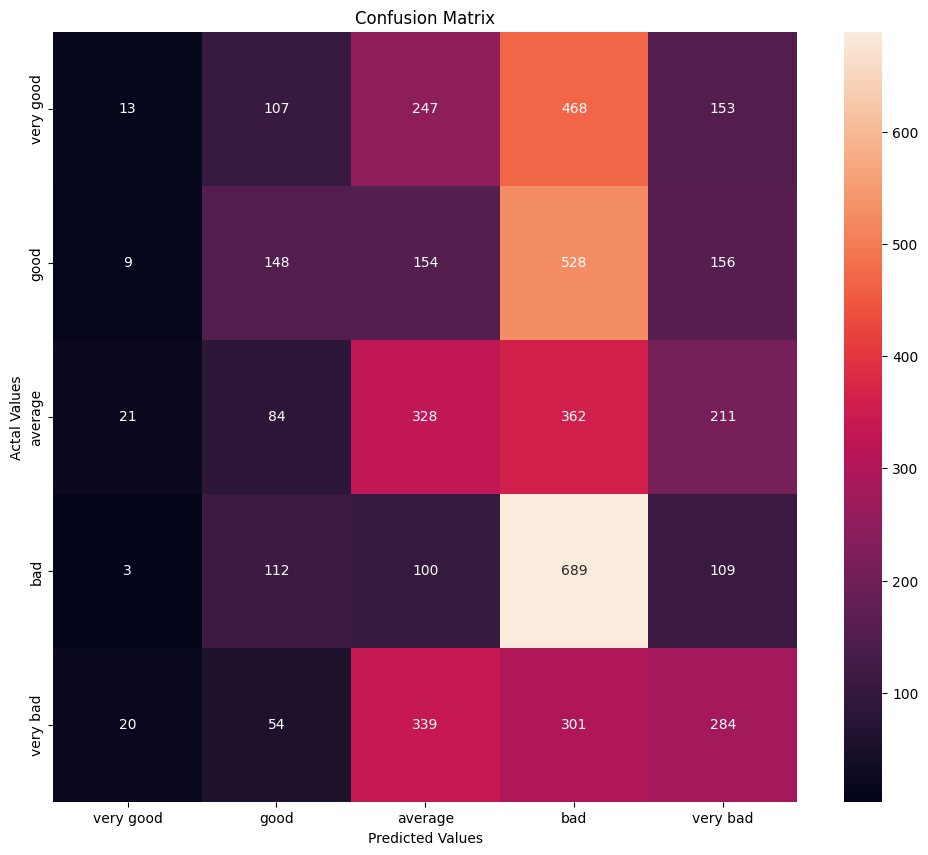

In [128]:


#--------------other kernels
## RBF------------------------------------------
##------------------------------------------------------
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model2.fit(TrainDF1, Train1Labels)



Prediction2 = SVM_Model2.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


[LibSVM]....*
optimization finished, #iter = 4046
obj = -790792.120504, rho = 0.723920
nSV = 7996, nBSV = 7970
....
*
optimization finished, #iter = 4052
obj = -785952.101595, rho = -0.851124
nSV = 7961, nBSV = 7928
...
*.*
optimization finished, #iter = 4003
obj = -772060.663314, rho = 0.280351
nSV = 7921, nBSV = 7903
....
*
optimization finished, #iter = 4040
obj = -777810.850347, rho = -0.723527
nSV = 7942, nBSV = 7920
....
*
optimization finished, #iter = 4030
obj = -769243.333791, rho = -0.897972
nSV = 7906, nBSV = 7878
....
*
optimization finished, #iter = 4022
obj = -785785.011758, rho = -0.378837
nSV = 7953, nBSV = 7937
...
*.*
optimization finished, #iter = 4011
obj = -756158.895350, rho = -0.789569
nSV = 7877, nBSV = 7859
...
*
optimization finished, #iter = 3997
obj = -741822.655515, rho = 0.710633
nSV = 7794, nBSV = 7770
....
*
optimization finished, #iter = 4043
obj = -787928.143572, rho = -0.180305
nSV = 7975, nBSV = 7963
...
*
optimization finished, #iter = 3946
obj = -7

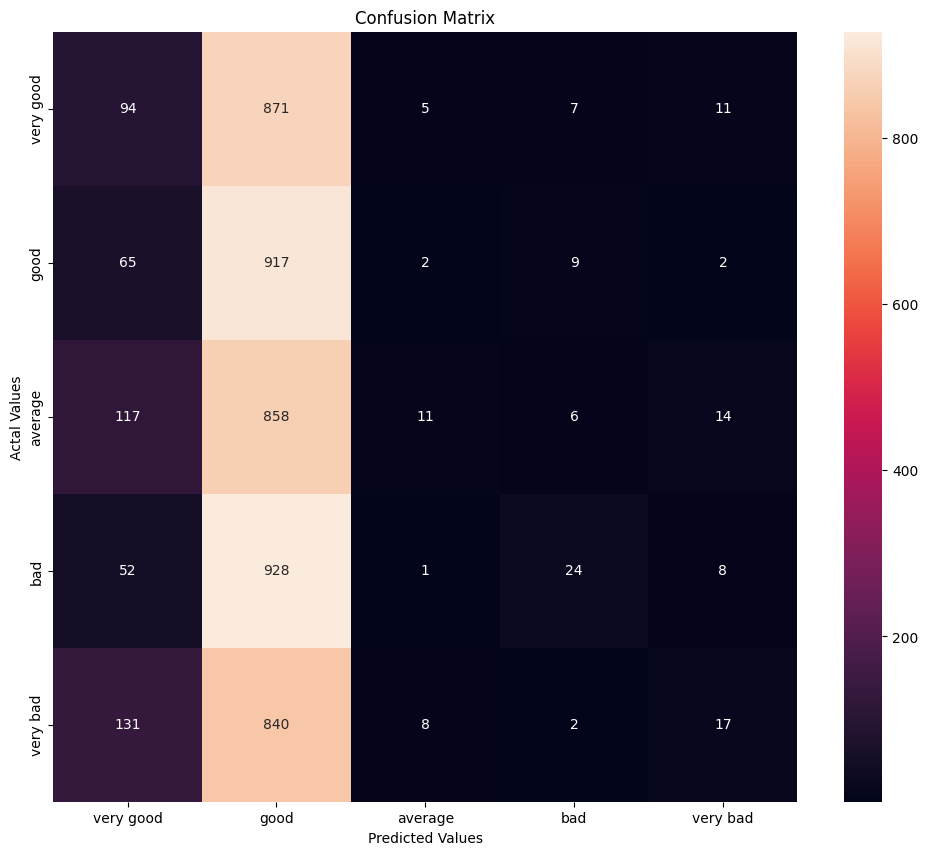

In [130]:


##-----------------------------------------
## POLY
##_--------------------------------------------------
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)

#print(SVM_Model3)
SVM_Model3.fit(TrainDF1, Train1Labels)




Prediction2 = SVM_Model3.predict(TestDF1)
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix2 = confusion_matrix(Test1Labels, Prediction2)
cm_df2 = pd.DataFrame(cnf_matrix2,
                     index = ['very good', 'good', 'average', 'bad','very bad'], 
                     columns = ['very good', 'good', 'average', 'bad','very bad'])
#Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm_df2, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
